In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

597

In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ormara
Processing Record 2 of Set 1 | luderitz
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | ganzhou
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | iracoubo
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | yekepa
Processing Record 22 of Set 1 | hobart
P

Processing Record 36 of Set 4 | tieli
Processing Record 37 of Set 4 | royan
Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | kungurtug
Processing Record 41 of Set 4 | gold coast
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | los llanos de aridane
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | komsomolskiy
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | lenoir city
Processing Record 50 of Set 4 | qax
Processing Record 1 of Set 5 | poso
Processing Record 2 of Set 5 | nuuk
Processing Record 3 of Set 5 | la sarre
Processing Record 4 of Set 5 | cheremshanka
Processing Record 5 of Set 5 | kampil
Processing Record 6 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 7 of Set 5 | skibbereen
Processing Record 8 of Set 5 | noyabrsk
Processing Record 

Processing Record 26 of Set 8 | verkhnetulomskiy
Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | catamarca
Processing Record 29 of Set 8 | traverse city
Processing Record 30 of Set 8 | arvika
Processing Record 31 of Set 8 | malwan
City not found. Skipping...
Processing Record 32 of Set 8 | baharampur
Processing Record 33 of Set 8 | zalha
Processing Record 34 of Set 8 | lasa
Processing Record 35 of Set 8 | tzaneen
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | vardo
Processing Record 38 of Set 8 | dawei
Processing Record 39 of Set 8 | chadan
Processing Record 40 of Set 8 | nioro
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | kokoda
Processing Record 43 of Set 8 | samarai
Processing Record 44 of Set 8 | port blair
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | gazojak
Processing Record 47 of Set 8 | guerrero negro
Processing Record 48 of Set 8 | hihifo
City not found. Skipping...
Processing Rec

Processing Record 19 of Set 12 | conde
Processing Record 20 of Set 12 | ilinskoye-khovanskoye
Processing Record 21 of Set 12 | itoman
Processing Record 22 of Set 12 | warrington
Processing Record 23 of Set 12 | antofagasta
Processing Record 24 of Set 12 | bougouni
Processing Record 25 of Set 12 | saverne
Processing Record 26 of Set 12 | dawlatabad
Processing Record 27 of Set 12 | bure
Processing Record 28 of Set 12 | salinopolis
Processing Record 29 of Set 12 | laramie
Processing Record 30 of Set 12 | aalestrup
City not found. Skipping...
Processing Record 31 of Set 12 | ahuimanu
Processing Record 32 of Set 12 | omboue
Processing Record 33 of Set 12 | borujerd
Processing Record 34 of Set 12 | bajil
Processing Record 35 of Set 12 | mponela
Processing Record 36 of Set 12 | makasar
Processing Record 37 of Set 12 | laguna
Processing Record 38 of Set 12 | bababe
City not found. Skipping...
Processing Record 39 of Set 12 | huescar
Processing Record 40 of Set 12 | broken hill
Processing Recor

In [9]:
len(city_data)

555

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ormara,25.2088,64.6357,84.40,74,100,5.59,PK,2021-07-16 22:27:22
1,Luderitz,-26.6481,15.1594,60.49,37,0,8.68,NA,2021-07-16 22:24:16
2,Punta Arenas,-53.1500,-70.9167,33.91,93,40,6.91,CL,2021-07-16 22:15:21
3,Busselton,-33.6500,115.3333,47.05,78,100,2.06,AU,2021-07-16 22:21:03
4,Lebu,-37.6167,-73.6500,48.22,71,10,13.58,CL,2021-07-16 22:27:23
5,Atuona,-9.8000,-139.0333,78.12,73,38,22.03,PF,2021-07-16 22:23:10
6,Ganzhou,28.8184,115.4327,79.02,85,100,3.51,CN,2021-07-16 22:27:23
7,Khatanga,71.9667,102.5000,42.55,64,8,5.10,RU,2021-07-16 22:25:56
8,Iracoubo,5.4802,-53.2011,78.24,80,67,5.91,GF,2021-07-16 22:27:33
9,Jamestown,42.0970,-79.2353,72.09,97,90,1.99,US,2021-07-16 22:15:23


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ormara,PK,2021-07-16 22:27:22,25.2088,64.6357,84.40,74,100,5.59
1,Luderitz,NA,2021-07-16 22:24:16,-26.6481,15.1594,60.49,37,0,8.68
2,Punta Arenas,CL,2021-07-16 22:15:21,-53.1500,-70.9167,33.91,93,40,6.91
3,Busselton,AU,2021-07-16 22:21:03,-33.6500,115.3333,47.05,78,100,2.06
4,Lebu,CL,2021-07-16 22:27:23,-37.6167,-73.6500,48.22,71,10,13.58
5,Atuona,PF,2021-07-16 22:23:10,-9.8000,-139.0333,78.12,73,38,22.03
6,Ganzhou,CN,2021-07-16 22:27:23,28.8184,115.4327,79.02,85,100,3.51
7,Khatanga,RU,2021-07-16 22:25:56,71.9667,102.5000,42.55,64,8,5.10
8,Iracoubo,GF,2021-07-16 22:27:33,5.4802,-53.2011,78.24,80,67,5.91
9,Jamestown,US,2021-07-16 22:15:23,42.0970,-79.2353,72.09,97,90,1.99


In [12]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

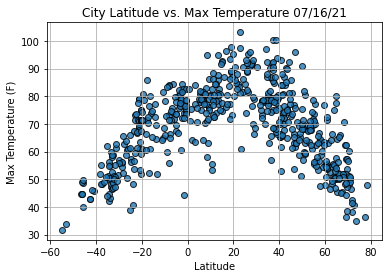

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

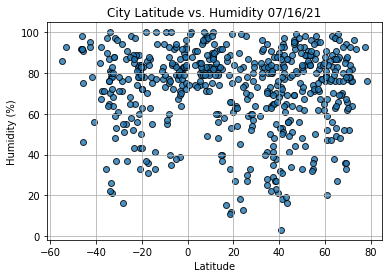

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

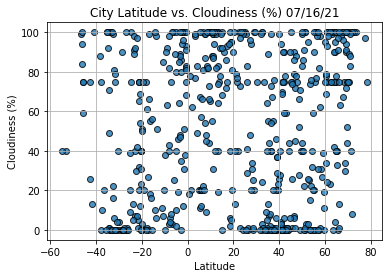

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")
            
# Show plot
plt.show()

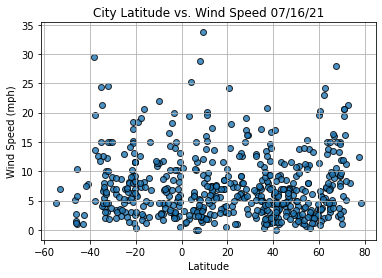

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

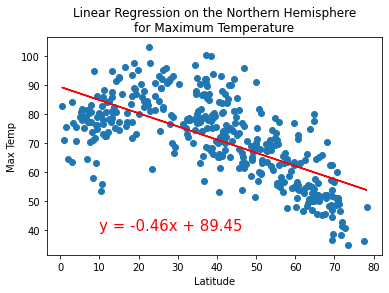

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(10,40))

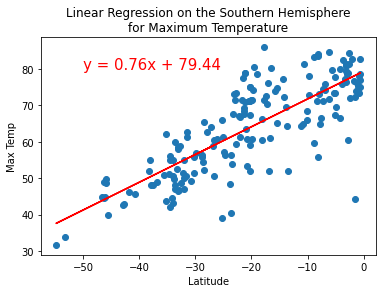

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(-50,80))

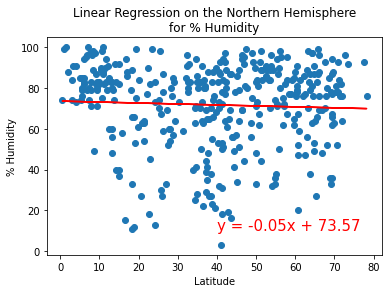

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',(40,10))

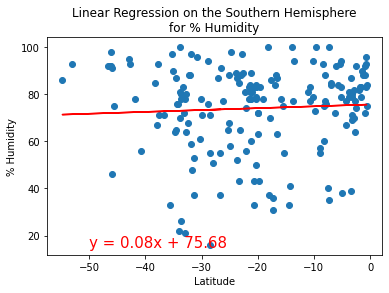

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', 
                       '% Humidity',(-50,15))

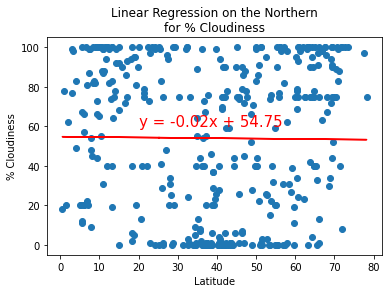

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern\nfor % Cloudiness', 
                       '% Cloudiness',(20,60))

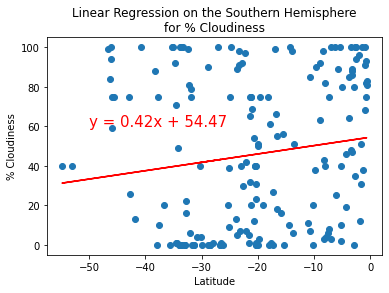

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

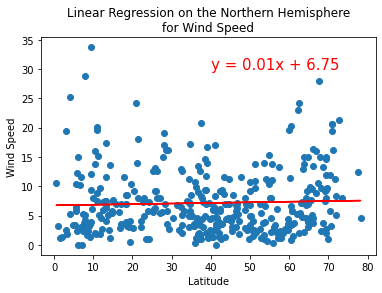

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(40,30))

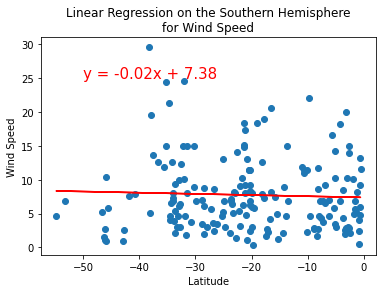

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(-50,25))